In [ ]:
# 구글 드라이브 마운트
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기, gameId column 제거
df_all = pd.read_csv('/content/gdrive/My Drive/data/high_diamond_ranked_10min.csv')
df_all = df_all.drop(['gameId'], axis='columns')

df_data = df_all.iloc[:, 1:]
df_label = df_all.iloc[:, 0]

print(df_all.columns)
print(df_data.shape)
print(df_label.shape)

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')
(9879, 38)
(9879,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, df_label, test_size=0.2, random_state=1234)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7903, 38)
(1976, 38)
(7903,)
(1976,)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
prediction = model.predict(X_test)

acc = 100 * accuracy_score(y_test, prediction)
pre = 100 * precision_score(y_test, prediction)
rec = 100 * recall_score(y_test,prediction)
f1 = 100 * f1_score(y_test,prediction)

print('Accuracy : %.2f%%'%(acc))
print('Precision: %.2f%%\nRecall: %.2f%%\nF1-score: %.2f%% '%(pre, rec, f1))

Accuracy : 72.87%
Precision: 73.23%
Recall: 71.14%
F1-score: 72.17% 


In [ ]:
#cut off 조절에 따른 모델의 성능을 평가해 보기 위하여 cut off 값 생성 및 각각의 성능 지표 도출
#cut off 값은 다양하게 선택 가능.
list = []
for i in np.linspace(0,1,100):
    pred = model.predict_proba(X_test)[:,1] > i
    cf_mtx = confusion_matrix(y_test, pred)
    acc = accuracy_score(y_test, pred)
    tpr = cf_mtx[0,0] / cf_mtx[0].sum()
    fpr = cf_mtx[1,0] / cf_mtx[1].sum()
    f1 = f1_score(y_test, pred)
    list.append([i, acc, f1, tpr, fpr])

cut_off = pd.DataFrame(list)
cut_off.columns = ["CUTOFF", "ACC", "F1", "TPR", "FPR"]
cut_off

CUTOFF       ACC        F1       TPR       FPR
0   0.000000  0.494433  0.661700  0.000000  0.000000
1   0.010101  0.495951  0.662373  0.003003  0.000000
2   0.020202  0.497470  0.663047  0.006006  0.000000
3   0.030303  0.501518  0.664852  0.014014  0.000000
4   0.040404  0.508603  0.668034  0.028028  0.000000
..       ...       ...       ...       ...       ...
95  0.959596  0.521761  0.063429  1.000000  0.967247
96  0.969697  0.518725  0.051844  1.000000  0.973388
97  0.979798  0.514676  0.036181  1.000000  0.981576
98  0.989899  0.507085  0.006122  1.000000  0.996929
99  1.000000  0.505567  0.000000  1.000000  1.000000

[100 rows x 5 columns]

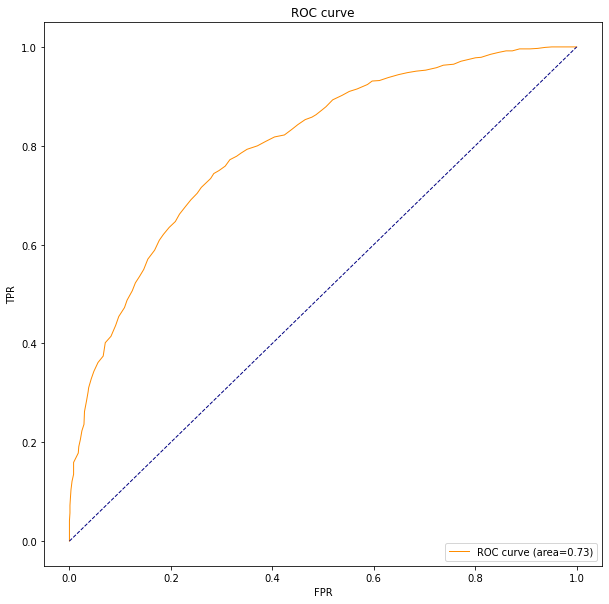

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, prediction)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(cut_off["FPR"],cut_off["TPR"], color="darkorange", lw=1, label="ROC curve (area=%.2f)" %roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")

In [ ]:
cut_off[cut_off["ACC"] == cut_off["ACC"].max()] #accuracy가 최대인 값

CUTOFF       ACC        F1       TPR       FPR
49  0.494949  0.729757  0.723602  0.743744  0.284545